---
title: Implementing Logistic Regression
author: Omar Armbruster
date: '2025-04-7'
image: "image.png"
description: "Those penguins won't know what hit them"
format: html
execute:
    message: false
    warning: false
---

# Abstract

This post examines the implementation of the logistic regression classifier. Using a linear model, we implement a gradient function that iteratively adjusts the weights used to score and classify a given dataset. We implement an additional term to our step function which allows for gradient descent with momentum. Using our implemented model, we perform a series of experiments that compare the efficiency of gradient descent and gradient descent with momentum, examine the effects of overfitting the model, and explore the efficacy of the model on empirical data. Based on these experiments, we can explore the capabilities and limits of logistic regression and gain a better understanding of gradient descent and one of its variations. 

# Introduction
If you've been following along closely with this blog, logistic regression may be a familiar topic. Some of you may have read my first post in which we explored logistic regression to classify the Palmer Penguins and determine their species based on other distinguishing features. For those of you who have since lain awake at night, anxiously wondering "How on earth did he do that?", fret no longer as this post is for you. Here we will build our own logistic regression model and test its limits through a series of experiments, including tests on empirical data (believe it or not, logistic regression works on non-penguin-related data as well).

We can first explore the implementation of our model here [fix this ahhhh]('github..com')

In [44]:
%load_ext autoreload
%autoreload 2
from logistic import LogisticRegression, GradientDescentOptimizer #, NewtonOptimizer

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Our implementation largely focuses on the implementation of the loss function `LogisticRegression.loss()` and the gradient function `LogisticRegression.grad()`.

We define our loss function as $$L(w) = \frac{1}{n}\Sigma^n_{i = 1}[-y_ilog(\sigma(s_i)) - (1 - y_i)log(1-\sigma(s_i))]$$

In [45]:
import torch
import matplotlib.pyplot as plt

In [46]:
def classification_data(n_points = 300, noise = 0.2, p_dims = 2):
    
    y = torch.arange(n_points) >= int(n_points/2)
    y = 1.0*y
    X = y[:, None] + torch.normal(0.0, noise, size = (n_points,p_dims))
    X = torch.cat((X, torch.ones((X.shape[0], 1))), 1)
    
    return X, y

X, y = classification_data(noise = 0.5)

In [53]:
LR = LogisticRegression() 
opt = GradientDescentOptimizer(LR)

loss = []
for _ in range(500):
    l = LR.loss(X,y)
    loss.append(l)
    opt.step(X, y, alpha = 0.1, beta = 0.9)

tensor([-0.7893, -0.7127, -0.6905, -0.7469, -0.7489, -0.7099, -0.7267, -0.7193,
        -0.7579, -0.7396, -0.7266, -0.7004, -0.6892, -0.6843, -0.7434, -0.7173,
        -0.7471, -0.7527, -0.7247, -0.7107, -0.7231, -0.7095, -0.7382, -0.7046,
        -0.6957, -0.7109, -0.6644, -0.7563, -0.7525, -0.6601, -0.7158, -0.7762,
        -0.6727, -0.7492, -0.8113, -0.7150, -0.6827, -0.7210, -0.7106, -0.6842,
        -0.7336, -0.7553, -0.7268, -0.7149, -0.7344, -0.6826, -0.6892, -0.7541,
        -0.6984, -0.7378, -0.6935, -0.7299, -0.7186, -0.6264, -0.7039, -0.7314,
        -0.7289, -0.7351, -0.6928, -0.7053, -0.7257, -0.7144, -0.7305, -0.7178,
        -0.6876, -0.7440, -0.6877, -0.6948, -0.7378, -0.6995, -0.7013, -0.7406,
        -0.6850, -0.6693, -0.7238, -0.7103, -0.7489, -0.7269, -0.6999, -0.7141,
        -0.7101, -0.7167, -0.7308, -0.7284, -0.7019, -0.7030, -0.7435, -0.7021,
        -0.7132, -0.7513, -0.7209, -0.6978, -0.7317, -0.7518, -0.7213, -0.7387,
        -0.7485, -0.7098, -0.7166, -0.72

tensor(0.2033)


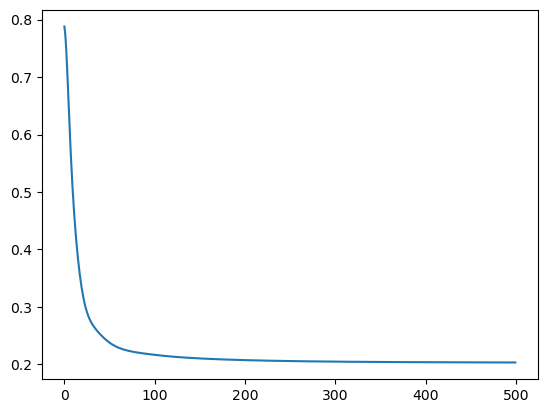

In [ ]:
plt.plot(loss)

In [245]:
## Data plotting function sourced from Phil Chodrow Lecture Notes
def plot_data(X, y, ax):
    assert X.shape[1] == 3, "This function only works for data created with p_dims == 2"
    targets = [0, 1]
    markers = ["o" , ","]
    for i in range(2):
        ix = y == targets[i]
        ax.scatter(X[ix,0], X[ix,1], s = 20,  c = 2*y[ix]-1, facecolors = "none", edgecolors = "darkgrey", cmap = "PuOr", vmin = -2, vmax = 2, alpha = 0.5, marker = markers[i])
    ax.set(xlabel = r"$x_1$", ylabel = r"$x_2$")

## Boundary drawing function sourced from Phil Chodrow Lecture Notes
def draw_line(w, x_min, x_max, ax, **kwargs):
    w_ = w.flatten()
    x = torch.linspace(x_min, x_max, 101)
    y = -(w_[0]*x + w_[2])/w_[1]
    l = ax.plot(x, y, **kwargs)

def plot_loss(loss, ax, **kwargs):
    ax.plot(loss, **kwargs)
    ax.set_xlabel('Iteration')
    ax.set_ylabel('Loss')

def plot_results(LR, X, y, loss, ax):
    plot_data(X,y,ax[0])
    draw_line(LR.w, -1, 2, ax[0], color = 'black')
    ax[0].set_title('Decision Boundary')
    ax[1].set_title('Loss')
    plot_loss(loss, ax[1])

In [96]:
X, y = classification_data(n_points = 500, noise = 0.2)

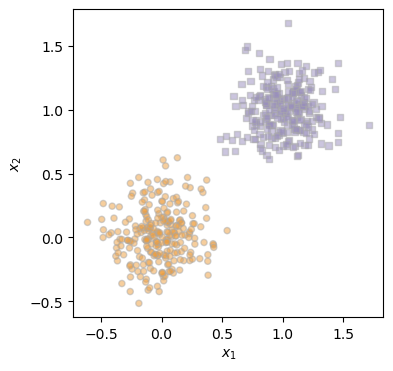

In [97]:
fig, ax = plt.subplots(1, 1, figsize = (4, 4))
plot_data(X, y, ax)

Vanilla Gradient Descent

In [63]:
LR = LogisticRegression() 
opt = GradientDescentOptimizer(LR)


loss = []
for _ in range(1000):
    l = LR.loss(X,y)
    loss.append(l)
    opt.step(X, y, alpha = 0.1, beta = 0)

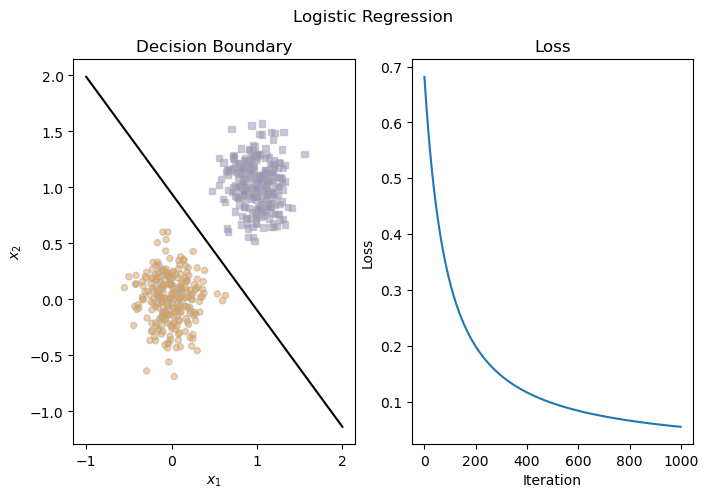

In [64]:
fig, ax = plt.subplots(1, 2, figsize = (8, 5))
fig.suptitle('Logistic Regression')
plot_results(LR, X, y, loss, ax)

Gradient Descent with Momentum

In [65]:
LR = LogisticRegression() 
opt = GradientDescentOptimizer(LR)


loss = []
for _ in range(500):
    l = LR.loss(X,y)
    loss.append(l)
    opt.step(X, y, alpha = 0.1, beta = 0.9)

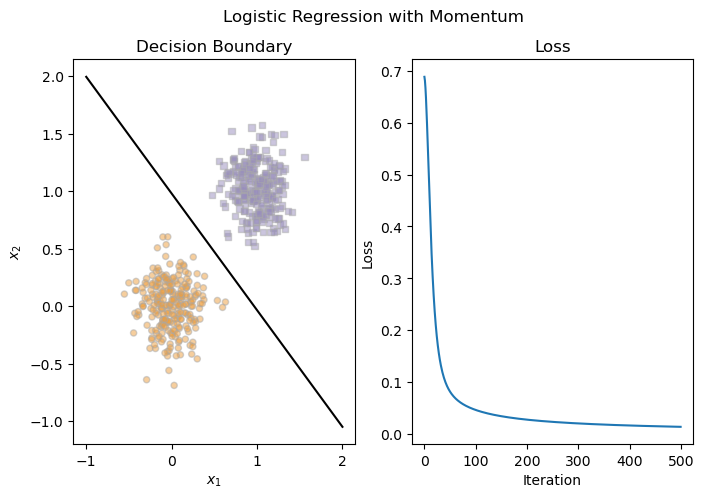

In [66]:
fig, ax = plt.subplots(1, 2, figsize = (8, 5))
fig.suptitle('Logistic Regression with Momentum')
plot_results(LR, X, y, loss, ax)

# Overfitting

In [113]:
Xo1, yo1 = classification_data(n_points = 100, noise = 0.8, p_dims = 500)
Xo2, yo2 = classification_data(n_points = 100, noise = 0.8, p_dims = 500)

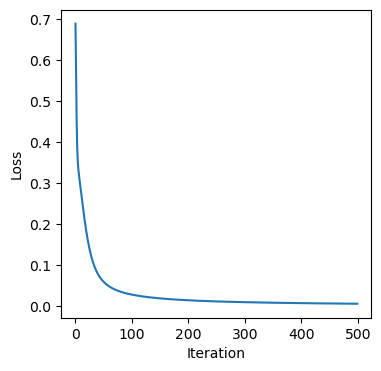

In [118]:
LR = LogisticRegression() 
opt = GradientDescentOptimizer(LR)

loss = []
for _ in range(500):
    l = LR.loss(Xo1,yo1)
    loss.append(l)
    # print(l)
    opt.step(Xo1, yo1, alpha = 0.005, beta = 0.9)

fig, ax = plt.subplots(1,1, figsize = (4,4))
plot_loss(loss, ax)

In [119]:
predo1 = LR.predict(Xo1)
acco1 = ((predo1 == yo1)*1.0).mean()
predo2 = LR.predict(Xo2)
acco2 = ((predo2 == yo2)*1.0).mean()
print('The accuracy on the training data is: {}. The accuracy on the testing data is: {}'.format(acco1, acco2))

The accuracy on the training data is: 1.0. The accuracy on the testing data is: 0.8600000143051147


# Empirical Data

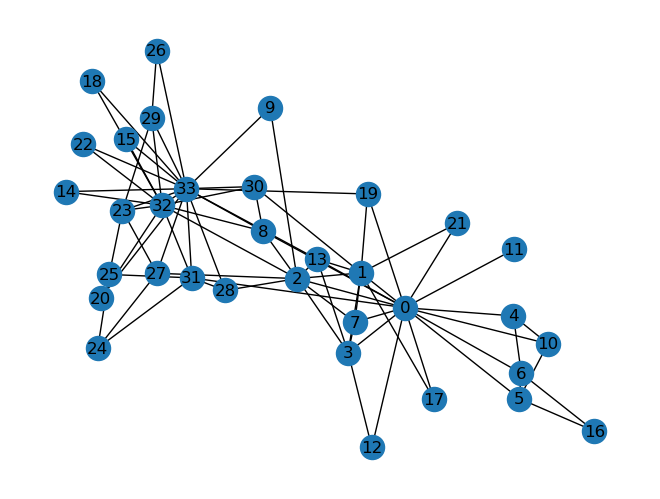

In [122]:
import networkx as nx
G = nx.karate_club_graph()
nx.draw(G, with_labels = True)

In [226]:

labels = torch.tensor([1 if G.nodes[i]['club'] == 'Mr. Hi' else 0 for i in range(len(G.nodes))])
labels

tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [227]:
A = torch.zeros((len(G.nodes), len(G.nodes)))
for edge in G.edges:
    A[edge[0], edge[1]] = 1.0
    A[edge[1], edge[0]] = 1.0

In [269]:
p = torch.randperm(len(labels))
X = A[p, :][:,p]
y = labels[p]

In [270]:
split_train = 0.6
split_test = 0.2
idx1 = int(split_train * len(y))
idx2 = int((1 - split_test) * len(y))
X_train = X[:idx1, :]
y_train = y[:idx1]
X_valid = X[idx1:idx2, :]
y_valid = y[idx1:idx2]
X_test = X[idx2:, :]
y_test = y[idx2:]

Text(0.5, 1.0, 'Karate Club Loss without Momentum')

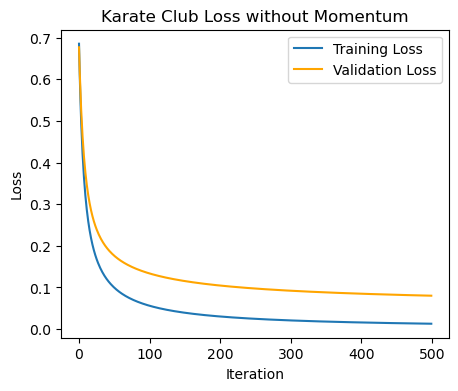

In [292]:
LR = LogisticRegression()
opt = GradientDescentOptimizer(LR)

loss = []
valid_loss = []
for _ in range(500):
    l = LR.loss(X_train,y_train)
    vl = LR.loss(X_valid, y_valid)
    loss.append(l)
    valid_loss.append(vl)
    opt.step(X_train, y_train, alpha = 0.5, beta = 0)

fig, ax = plt.subplots(1,1, figsize = (5,4))
plot_loss(loss, ax, label = 'Training Loss')
plot_loss(valid_loss, ax, color = 'orange', label = 'Validation Loss')
plt.legend()
plt.title('Karate Club Loss without Momentum')

In [ ]:
pred_train = LR.predict(X_train)
acc1 = ((pred_train == y_train)*1.0).mean()
pred_valid = LR.predict(X_valid)
acc2 = ((pred_valid == y_valid)*1.0).mean()
pred_test = LR.predict(X_test)
acc3 = ((pred_test == y_test)*1.0).mean()
print('The accuracy on the training data is: {}. The accuracy on the validation data is: {}. The accuracy on the testing data is: {}.'.format(acc1, acc2, acc3))

The accuracy on the training data is: 1.0. The accuracy on the validation data is: 1.0. The accuracy on the testing data is: 0.8571428656578064.


Text(0.5, 1.0, 'Karate Club Loss with Momentum')

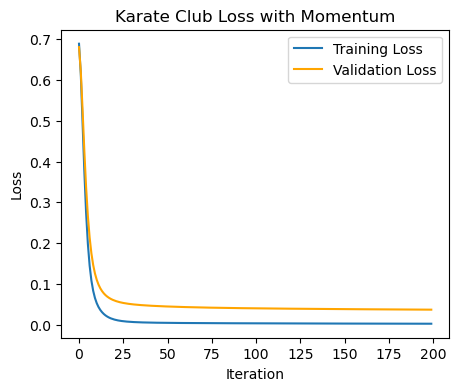

In [293]:
LR = LogisticRegression()
opt = GradientDescentOptimizer(LR)

loss = []
valid_loss = []
for _ in range(200):
    l = LR.loss(X_train,y_train)
    vl = LR.loss(X_valid, y_valid)
    loss.append(l)
    valid_loss.append(vl)
    opt.step(X_train, y_train, alpha = 0.5, beta = 0.9)

fig, ax = plt.subplots(1,1, figsize = (5,4))
plot_loss(loss, ax, label = 'Training Loss')
plot_loss(valid_loss, ax, color = 'orange', label = 'Validation Loss')
plt.legend()
plt.title('Karate Club Loss with Momentum')

In [ ]:
pred_train = LR.predict(X_train)
acc1 = ((pred_train == y_train)*1.0).mean()
pred_valid = LR.predict(X_valid)
acc2 = ((pred_valid == y_valid)*1.0).mean()
pred_test = LR.predict(X_test)
acc3 = ((pred_test == y_test)*1.0).mean()
print('The accuracy on the training data is: {}. The accuracy on the validation data is: {}. The accuracy on the testing data is: {}.'.format(acc1, acc2, acc3))

The accuracy on the training data is: 1.0. The accuracy on the validation data is: 1.0. The accuracy on the testing data is: 0.8571428656578064.


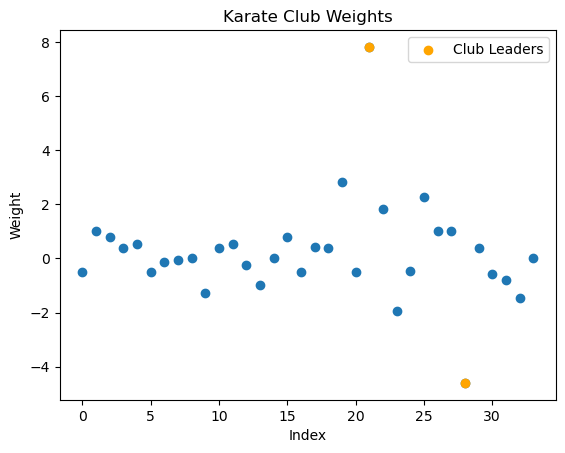

In [290]:
idxs = torch.linspace(0,len(G.nodes) - 1, len(G.nodes), dtype = int)

mrhi = torch.where(p == 0)[0][0]
johna = torch.where(p == 33)[0][0]
plt.scatter(idxs, LR.w)
plt.scatter([mrhi, johna], [LR.w[mrhi], LR.w[johna]], color = 'orange', label = 'Club Leaders')
plt.xlabel('Index')
plt.ylabel('Weight')
plt.title('Karate Club Weights')
plt.legend()

# Conclusion
Logistic Regression